# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

- Amir Sahrani (12661651)
- Jonas Schäfer (14039982)

## Importing packages

In [1]:
import numpy as np
import math
from math import factorial, exp, tan, cos
import sympy
import matplotlib.pyplot as plt
import sys

In [2]:
COLORS_BY_KEY = {'black': '#2B303A', 'green': '#0C7C59',
                 'blue': '#58A4B0', 'pink': '#9C7A97', 'red': '#D64933'}
COLORS = list(COLORS_BY_KEY.values())

-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

epsilon_mach = 2.220446049250313e-16
h_min = 1e-08 (at index 8)


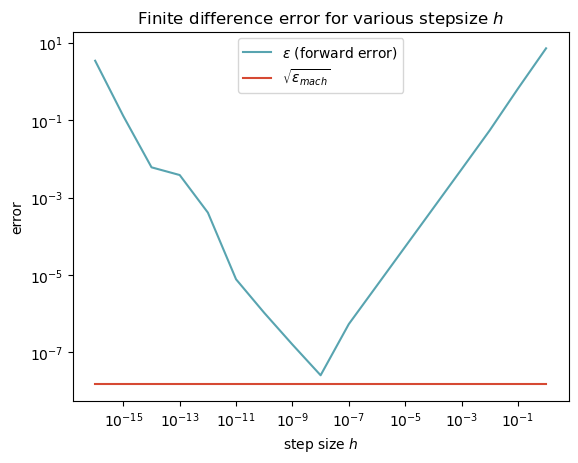

In [3]:
def approx_f_prime_fd(f, x, h):
    return (f(x+h)-f(x))/h


X = sympy.symbols('x')
f = sympy.diff(sympy.tan(X), X)
solution = f.subs(X, 1).evalf()  # type: ignore

e_mach = sys.float_info.epsilon
print(f'epsilon_mach = {e_mach}')

errors_fd = []
hs = [10**-k for k in range(0, 17)]
errors_mach = [np.sqrt(e_mach)]*len(hs)

for h in hs:
    finite_difference = approx_f_prime_fd(tan, 1, h)
    errors_fd.append(abs(float(finite_difference-solution)))

idx_h_min = errors_fd.index(min(errors_fd))
print(f'h_min = {hs[idx_h_min]} (at index {idx_h_min})')
plt.loglog(hs, errors_fd, c=COLORS[2])
plt.loglog(hs, errors_mach, c=COLORS[4])
plt.legend(['$\epsilon$ (forward error)', '$\sqrt{\epsilon_{mach}}$'])
plt.title('Finite difference error for various stepsize $h$')
plt.xlabel('step size $h$')
plt.ylabel('error')
plt.show()

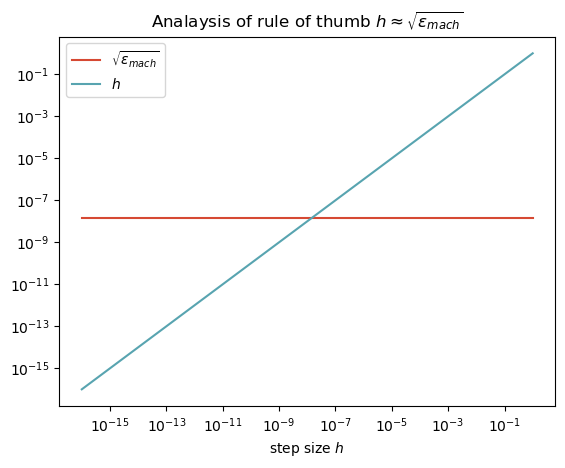

In [4]:
plt.loglog(hs, errors_mach, c=COLORS[4])
plt.loglog(hs, hs, c=COLORS[2])
plt.legend(['$\sqrt{\epsilon_{mach}}$', '$h$'])
plt.title('Analaysis of rule of thumb $h \\approx \\sqrt{\\epsilon_{mach}}$')
plt.xlabel('step size $h$')
plt.show()

We can see here that $h \approx \sqrt{\epsilon_{mach}}$ holds near the minimum as:

$$h_{min} \approx 10^{-8}$$
$$\sqrt{\epsilon_{mach}} \approx \sqrt{10^{-16}} = 10^{-8}$$

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

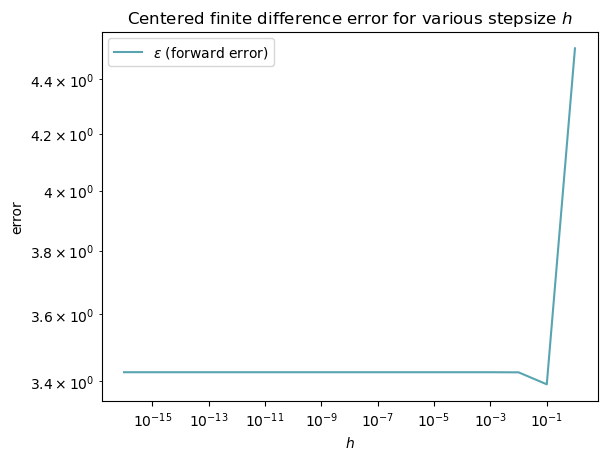

In [5]:
def approx_f_prime_center(f, x, h):
    return (f(x+h)-f(x-h))/2*h


errors_center = []
for h in hs:
    finite_difference = approx_f_prime_center(tan, 1, h)
    errors_center.append(abs(finite_difference-solution))

plt.loglog(hs, errors_center, c=COLORS[2])
plt.title('Centered finite difference error for various stepsize $h$')
plt.legend(['$\\epsilon$ (forward error)'])
plt.xlabel('$h$')
plt.ylabel('error')
plt.show()

Write your answer, using $\LaTeX$, in this box.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Considering the information of each new term is decreasing, it would make sense to stop the summation once the new term is of the same order of magnitude as the machine error $\epsilon_{mach}$, latest once once we reach a term where $\frac{x^i}{i!} \leq \epsilon_{mach}$. The reasoning behind this stopping criterion is that we are unable to update the value with added precision once $\epsilon_{mach}$ is the larger value. This is due to the rounding error that manifests itself during the summation operation.

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

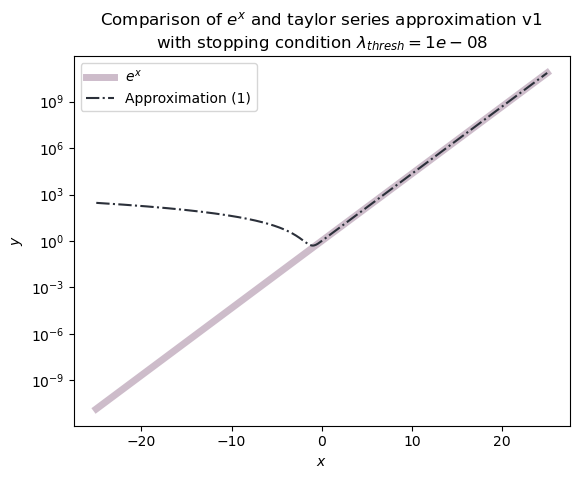

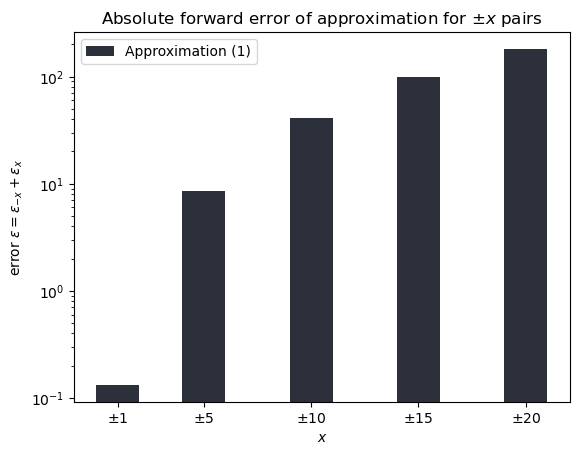

In [86]:
xs = np.linspace(-25, 25, 500)
x_values = np.array([1, 5, 10, 15, 20])
lambda_thresh = 10**-8


# Approximation (1)
def taylor_series_v1(x):
    total = 1 + x
    i = 2
    while x**i/factorial(i) > lambda_thresh:
        total += x**i/factorial(i)
        i += 1
    return total

# Plotting whole spectrum
v_taylor_series_v1 = np.vectorize(taylor_series_v1)
y, y_hat_1 = np.exp(xs), v_taylor_series_v1(xs)


# Data for plotting only x_value pairs
true_pos, true_neg = np.exp(x_values), np.exp(-x_values)
chosen_y_hat_1_pos, chosen_y_hat_1_neg = v_taylor_series_v1(x_values), v_taylor_series_v1(-x_values)
errors_1 = np.abs(chosen_y_hat_1_pos-true_pos) + np.abs(chosen_y_hat_1_neg-true_neg)


plt.semilogy(xs, y, linewidth=5, color=COLORS[3], alpha=0.5)
plt.semilogy(xs, y_hat_1, linewidth=1.5, color=COLORS[0], linestyle='-.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$e^x$', 'Approximation (1)'])
plt.title('Comparison of $e^x$ and taylor series approximation v1\n' +
          f'with stopping condition $\\lambda_{{thresh}}={lambda_thresh}$')
plt.show()


bar1 = plt.bar(x_values, errors_1, color=COLORS[0], width=2.0)
plt.xticks(x_values, ['$\\pm$' + str(x_value) for x_value in x_values])
plt.xlabel('$x$')
plt.ylabel('error $\\epsilon = \\epsilon_{-x} + \\epsilon_{x}$')
plt.yscale('log')
plt.legend(['Approximation (1)', 'Approximation (2)'])
plt.title('Absolute forward error of approximation for $\\pm x$ pairs')
plt.show()

We can clearly observe a highly flawed approximation for all $x \lt 0$ using the standard taylor series **Approximation (1)** proposed above, thus rapidly growing our forward error with increasing $\pm x$ pairs. For positive values of x, we observe a near-perfect approximation. Varying the threshold for this series does not appear to substantially influence the accuracy of our approximations for $x \lt 0$.

For more accurate estimates, we require a different taylor expansion than described above. These will be introduced in the following segments.

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Write your answer, using $\LaTeX$, in this box.

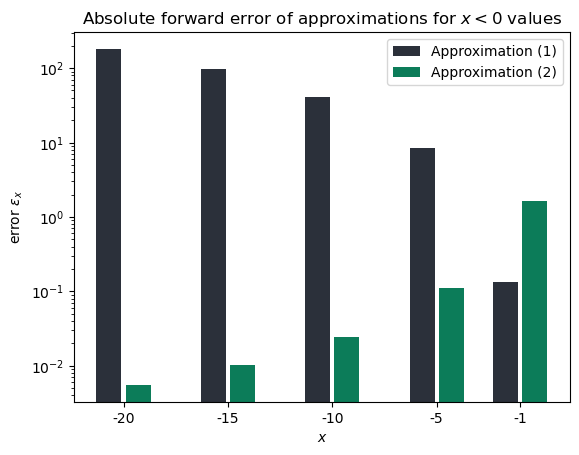

In [79]:
errors = []

# Approximation (2)
def taylor_series_v2(x):
    if x < 0:
        return 1/taylor_series_v1(x)
    else:
        return taylor_series_v1(x)

v_taylor_series_v2 = np.vectorize(taylor_series_v2)
chosen_y_hat_2_pos, chosen_y_hat_2_neg = v_taylor_series_v2(x_values), v_taylor_series_v2(-x_values)
errors_2 = np.abs(chosen_y_hat_2_neg-true_neg)
y_hat_2 = v_taylor_series_v2(xs)

bar1 = plt.bar(-x_values-0.7, errors_1, color=COLORS[0], width=1.2)
bar2 = plt.bar(-x_values+0.7, errors_2, color=COLORS[1], width=1.2)
plt.xticks(-x_values, -x_values)
plt.xlabel('$x$')
plt.ylabel('error $\\epsilon_{{x}}$')
plt.yscale('log')
plt.legend(['Approximation (1)', 'Approximation (2)'])
plt.title('Absolute forward error of approximations for $x < 0$ values')
plt.show()

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

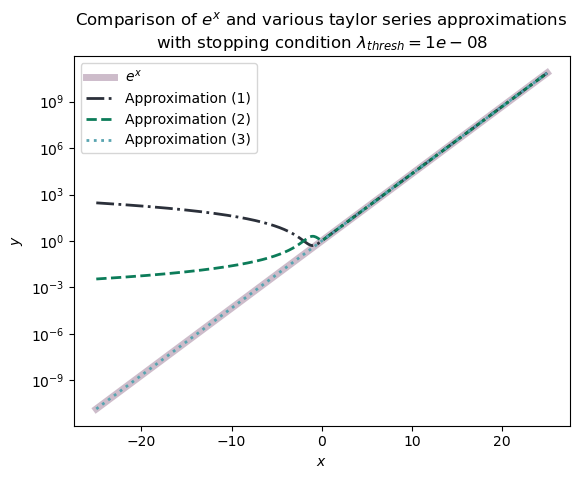

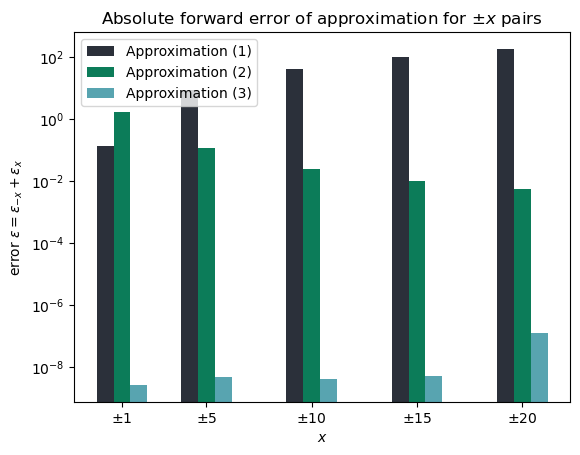

In [85]:
# Approximation (3)
def taylor_series_v3(x):
    if x < 0:
        total = 1 - x
        i = 2
        while (-x)**i/factorial(i) > lambda_thresh:
            total += (-x)**i/factorial(i)
            i += 1
        return 1/total
    else:
        return taylor_series_v1(x)
    
v_taylor_series_v3 = np.vectorize(taylor_series_v3)
y_hat_3 = v_taylor_series_v3(xs)
selected_y_hat_3_pos, selected_y_hat_3_neg = v_taylor_series_v3(x_values), v_taylor_series_v3(-x_values)
errors_3 = np.abs(selected_y_hat_3_pos-true_pos) + np.abs(selected_y_hat_3_neg-true_neg)

plt.semilogy(xs, y, linewidth=5, color=COLORS[3], alpha=0.5)
plt.semilogy(xs, y_hat_1, linewidth=2.0, color=COLORS[0], linestyle='-.')
plt.semilogy(xs, y_hat_2, linewidth=2.0, color=COLORS[1], linestyle='--')
plt.semilogy(xs, y_hat_3, linewidth=2.0, color=COLORS[2], linestyle=':')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$e^x$', 'Approximation (1)', 'Approximation (2)', 'Approximation (3)'])
plt.title('Comparison of $e^x$ and various taylor series approximations\n' +
          f'with stopping condition $\\lambda_{{thresh}}={lambda_thresh}$')
plt.show()


bar1 = plt.bar(x_values-0.8, errors_1, color=COLORS[0], width=0.8)
bar2 = plt.bar(x_values, errors_2, color=COLORS[1], width=0.8)
bar2 = plt.bar(x_values+0.8, errors_3, color=COLORS[2], width=0.8)
plt.xticks(x_values, ['$\\pm$' + str(x_value) for x_value in x_values])
plt.xlabel('$x$')
plt.ylabel('error $\\epsilon = \\epsilon_{-x} + \\epsilon_{x}$')
plt.yscale('log')
plt.legend(['Approximation (1)', 'Approximation (2)', 'Approximation (3)'])
plt.title('Absolute forward error of approximation for $\\pm x$ pairs')
plt.show()

Write your answer, using $\LaTeX$, in this box.